In [1]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

from scipy.spatial.distance import squareform


In [2]:
def investigate_comp(comp, resdf):
    def avg_cols(df, cols):
        return df[cols].mean(axis=1)
    comp_list = list(range(0,resdf.shape[1]))
    comp_list.remove(comp)
    other_pts = avg_cols(resdf,comp_list)
    return resdf[comp] - other_pts
    

In [3]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

In [4]:
# the formal rec might be 10% but I think I'm going to go with 5% for now
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]

In [5]:
sympdf.shape

(6031, 147)

In [6]:
# patient is a mixture of classes but it's meant to represent probs rather than actual multiple class labels
# so this model is less complex, but it might still be more appropriate, it'll depend

model = StepMix(n_components=9, measurement="binary", verbose=0, random_state=321)


In [7]:
model.fit(sympdf)


Fitting StepMix...


Initializations (n_init) :   0%|          | 0/1 [00:00<?, ?it/s]

Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.38s/it, max_LL=-4.1e+5, max_avg_LL=-68]


StepMix(measurement='binary', n_components=9, random_state=321)

In [8]:
grid = {
    'n_components': [ 2,3, 4,5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],
}





In [291]:
def get_best_params(randomstate ):
    model = StepMix(n_components=9, measurement="binary", verbose=0, random_state=randomstate)

    results = dict(param_n_components=[], aic=[], bic=[])

    # Same model and grid as above
    for g in ParameterGrid(grid):
        model.set_params(**g)
        model.fit(sympdf)
        results['param_n_components'].append(g['n_components'])
        results['aic'].append(model.aic(sympdf))
        results['bic'].append(model.bic(sympdf))

    # Save results to a dataframe
    results = pd.DataFrame(results)
    return(results.iloc[results['bic'].idxmin()]['param_n_components'])


In [292]:
get_best_params(132)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.20it/s, max_LL=-4.31e+5, max_avg_LL=-71.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.64it/s, max_LL=-4.22e+5, max_avg_LL=-70]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.73it/s, max_LL=-4.18e+5, max_avg_LL=-69.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.46s/it, max_LL=-4.15e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.10s/it, max_LL=-4.13e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.89s/it, max_LL=-4.12e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.53s/it, max_LL=-4.11e+5, max_avg_LL=-68.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.51s/it, max_LL=-4.1e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.45s/it, max_LL=-4.09e+5, max_avg_LL=-67.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.49s/it, max_LL=-4.09e+5, max_avg_LL=-67.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it, max_LL=-4.08e+5, max_avg_LL=-67.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.54s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.64s/it, max_LL=-4.06e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.83s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.11s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:16<00:00, 16.33s/it, max_LL=-4.05e+5, max_avg_LL=-67.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.11s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.73s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.10s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:14<00:00, 14.92s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.11s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:14<00:00, 14.66s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.47s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.30s/it, max_LL=-4.01e+5, max_avg_LL=-66.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


14.0

In [293]:
ncomps = [] 
for i in range(10):
    ncomps.append(get_best_params(i))

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.74it/s, max_LL=-4.31e+5, max_avg_LL=-71.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.57it/s, max_LL=-4.22e+5, max_avg_LL=-70]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.99it/s, max_LL=-4.18e+5, max_avg_LL=-69.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.03it/s, max_LL=-4.15e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.46s/it, max_LL=-4.13e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.29s/it, max_LL=-4.12e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.99s/it, max_LL=-4.11e+5, max_avg_LL=-68.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.64s/it, max_LL=-4.1e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.82s/it, max_LL=-4.09e+5, max_avg_LL=-67.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.61s/it, max_LL=-4.09e+5, max_avg_LL=-67.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.18s/it, max_LL=-4.08e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.17s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.77s/it, max_LL=-4.07e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.43s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.86s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.22s/it, max_LL=-4.05e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.01s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.66s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.47s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.38s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.65s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.95s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.91s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.31s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.71it/s, max_LL=-4.31e+5, max_avg_LL=-71.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.70it/s, max_LL=-4.22e+5, max_avg_LL=-70]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.77it/s, max_LL=-4.18e+5, max_avg_LL=-69.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.43s/it, max_LL=-4.15e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.46s/it, max_LL=-4.13e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.68s/it, max_LL=-4.12e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.43s/it, max_LL=-4.11e+5, max_avg_LL=-68.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.59s/it, max_LL=-4.1e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.53s/it, max_LL=-4.09e+5, max_avg_LL=-67.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it, max_LL=-4.09e+5, max_avg_LL=-67.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.83s/it, max_LL=-4.08e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it, max_LL=-4.07e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.87s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.57s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.11s/it, max_LL=-4.05e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.58s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.22s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 14.00s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.82s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.82s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.20s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.86s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.64s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.97it/s, max_LL=-4.31e+5, max_avg_LL=-71.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.99it/s, max_LL=-4.22e+5, max_avg_LL=-70]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.02it/s, max_LL=-4.19e+5, max_avg_LL=-69.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.20s/it, max_LL=-4.15e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.92s/it, max_LL=-4.13e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.25s/it, max_LL=-4.12e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.23s/it, max_LL=-4.11e+5, max_avg_LL=-68.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.37s/it, max_LL=-4.1e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.88s/it, max_LL=-4.09e+5, max_avg_LL=-67.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.83s/it, max_LL=-4.08e+5, max_avg_LL=-67.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.86s/it, max_LL=-4.08e+5, max_avg_LL=-67.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.44s/it, max_LL=-4.06e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.96s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.07s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.10s/it, max_LL=-4.05e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.60s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.71s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.33s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:14<00:00, 14.45s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.48s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.90s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.57s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.08s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.32it/s, max_LL=-4.31e+5, max_avg_LL=-71.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.43it/s, max_LL=-4.22e+5, max_avg_LL=-70]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.69it/s, max_LL=-4.18e+5, max_avg_LL=-69.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.07it/s, max_LL=-4.15e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.20s/it, max_LL=-4.13e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.43s/it, max_LL=-4.12e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.53s/it, max_LL=-4.11e+5, max_avg_LL=-68.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it, max_LL=-4.1e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it, max_LL=-4.09e+5, max_avg_LL=-67.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.23s/it, max_LL=-4.09e+5, max_avg_LL=-67.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.71s/it, max_LL=-4.08e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.16s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.98s/it, max_LL=-4.07e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.21s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.23s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.27s/it, max_LL=-4.05e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.89s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.82s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.16s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.70s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.04s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.43s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.34s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.75s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.84it/s, max_LL=-4.31e+5, max_avg_LL=-71.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.51it/s, max_LL=-4.22e+5, max_avg_LL=-70]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.59it/s, max_LL=-4.18e+5, max_avg_LL=-69.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.38it/s, max_LL=-4.15e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.49it/s, max_LL=-4.13e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.18s/it, max_LL=-4.12e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.93s/it, max_LL=-4.11e+5, max_avg_LL=-68.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.56s/it, max_LL=-4.1e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.71s/it, max_LL=-4.09e+5, max_avg_LL=-67.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.90s/it, max_LL=-4.09e+5, max_avg_LL=-67.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.54s/it, max_LL=-4.08e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.43s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.12s/it, max_LL=-4.06e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.16s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.83s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.74s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.06s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.93s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.33s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.93s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.76s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.23s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.75s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:16<00:00, 16.64s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.87it/s, max_LL=-4.31e+5, max_avg_LL=-71.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.81it/s, max_LL=-4.22e+5, max_avg_LL=-70]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.36it/s, max_LL=-4.18e+5, max_avg_LL=-69.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.60s/it, max_LL=-4.15e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it, max_LL=-4.13e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.08s/it, max_LL=-4.12e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.58s/it, max_LL=-4.11e+5, max_avg_LL=-68.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.85s/it, max_LL=-4.1e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.12s/it, max_LL=-4.09e+5, max_avg_LL=-67.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.39s/it, max_LL=-4.09e+5, max_avg_LL=-67.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.02s/it, max_LL=-4.08e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.27s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.73s/it, max_LL=-4.07e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.91s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.50s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.52s/it, max_LL=-4.05e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.84s/it, max_LL=-4.04e+5, max_avg_LL=-67]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.92s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:16<00:00, 16.41s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.48s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.61s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.17s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.84s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.69s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.72it/s, max_LL=-4.31e+5, max_avg_LL=-71.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.99it/s, max_LL=-4.22e+5, max_avg_LL=-70]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.75it/s, max_LL=-4.18e+5, max_avg_LL=-69.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.24it/s, max_LL=-4.15e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.42s/it, max_LL=-4.13e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.78s/it, max_LL=-4.12e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.17s/it, max_LL=-4.11e+5, max_avg_LL=-68.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.30s/it, max_LL=-4.1e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.75s/it, max_LL=-4.09e+5, max_avg_LL=-67.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.04s/it, max_LL=-4.08e+5, max_avg_LL=-67.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it, max_LL=-4.08e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.27s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it, max_LL=-4.06e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.14s/it, max_LL=-4.05e+5, max_avg_LL=-67.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.57s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.87s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.69s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.57s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.48s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.93s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.79s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.29it/s, max_LL=-4.31e+5, max_avg_LL=-71.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.04it/s, max_LL=-4.22e+5, max_avg_LL=-70]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.23it/s, max_LL=-4.18e+5, max_avg_LL=-69.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.33s/it, max_LL=-4.15e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.06it/s, max_LL=-4.13e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.00s/it, max_LL=-4.12e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.15s/it, max_LL=-4.11e+5, max_avg_LL=-68.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.39s/it, max_LL=-4.1e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it, max_LL=-4.09e+5, max_avg_LL=-67.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it, max_LL=-4.09e+5, max_avg_LL=-67.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.70s/it, max_LL=-4.08e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.36s/it, max_LL=-4.06e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.90s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.87s/it, max_LL=-4.05e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.89s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.45s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.68s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.40s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.79s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.62s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.62s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.41s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.38it/s, max_LL=-4.31e+5, max_avg_LL=-71.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.33it/s, max_LL=-4.22e+5, max_avg_LL=-70]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.08it/s, max_LL=-4.18e+5, max_avg_LL=-69.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.40s/it, max_LL=-4.15e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.22s/it, max_LL=-4.13e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.03s/it, max_LL=-4.12e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.82s/it, max_LL=-4.11e+5, max_avg_LL=-68.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.71s/it, max_LL=-4.1e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.93s/it, max_LL=-4.09e+5, max_avg_LL=-67.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.98s/it, max_LL=-4.09e+5, max_avg_LL=-67.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.40s/it, max_LL=-4.08e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.32s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.47s/it, max_LL=-4.06e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.49s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.81s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.94s/it, max_LL=-4.05e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.18s/it, max_LL=-4.04e+5, max_avg_LL=-67]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.75s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.56s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.64s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.16s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.80s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.32s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.72it/s, max_LL=-4.31e+5, max_avg_LL=-71.5]

Fitting StepMix...

Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.67it/s, max_LL=-4.22e+5, max_avg_LL=-70]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.63it/s, max_LL=-4.18e+5, max_avg_LL=-69.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.15it/s, max_LL=-4.15e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.67s/it, max_LL=-4.13e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.34s/it, max_LL=-4.12e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.96s/it, max_LL=-4.11e+5, max_avg_LL=-68.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it, max_LL=-4.1e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it, max_LL=-4.09e+5, max_avg_LL=-67.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.47s/it, max_LL=-4.09e+5, max_avg_LL=-67.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it, max_LL=-4.08e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.08s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.69s/it, max_LL=-4.06e+5, max_avg_LL=-67.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.87s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.91s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.50s/it, max_LL=-4.05e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.82s/it, max_LL=-4.04e+5, max_avg_LL=-67.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.53s/it, max_LL=-4.04e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.53s/it, max_LL=-4.04e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.14s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.71s/it, max_LL=-4.03e+5, max_avg_LL=-66.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.76s/it, max_LL=-4.02e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.64s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.76s/it, max_LL=-4.01e+5, max_avg_LL=-66.6]


In [298]:
np.mean(ncomps)

12.9

In [299]:
# average 12.9 so we're sticking with 13! great! 

12.5

In [14]:
model = StepMix(n_components=13, measurement="binary", verbose=1, random_state=321)
model.fit(sympdf)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.77s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]

MODEL REPORT
    Measurement model parameters
          model_name                                                    binary                                                                                                
          class_no                                                          0       1       2       3       4       5       6       7       8       9       10      11      12
          param variable                                                                                                                                                      
          pis   Symptom_Acid_reflux                                     0.1037  0.6652  0.1314  0.3749  0.4235  0.7062  0.4805  0.2531  0.3659  0.3481  0.0605  0.2597  0.4439
                Symptom_Acute_confusion                                 0.0420  0.3145  0.1475  0.1973  0.2995  0.6950  0.4359  0.0099  0.1078  0.1068  0.0033  0.2926  0.0996
                Symptom_Altered_smell                                   0.1398 

StepMix(measurement='binary', n_components=13, random_state=321, verbose=1)

In [15]:
# save model using pkl
with open('output/stepmix_13_010324.pkl', 'wb') as f:
    pkl.dump(model, f)

In [16]:
mm = model.get_mm_df()
mm = mm.reset_index()
mm  = mm.drop("model_name",axis=1)
mm  = mm.drop("param",axis=1)
mm.index=mm['variable']
mm = mm.drop("variable", axis=1)

mm.to_csv("output/stepmix_13_010324_mmdf.csv")

/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:1173: FutureWarning: The provided callable <function mean at 0x1042f7380> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


In [123]:
# These are just the most prevalent symptoms per cluster
# in general, this is dominated by symptoms with high cross-dataset prevalence
print(mm.sort_values(0,ascending=False).head(10).index)
print(mm.sort_values(2,ascending=False).head(10).index)
print(mm.sort_values(3,ascending=False).head(10).index)
print(mm.sort_values(4,ascending=False).head(10).index)
print(mm.sort_values(5,ascending=False).head(10).index)
print(mm.sort_values(6,ascending=False).head(10).index)
print(mm.sort_values(7,ascending=False).head(10).index)

Index(['Symptom_PEM', 'Symptom_Memory_short', 'Symptom_Insomnia',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Shortness_of_breath', 'Symptom_Tightness_of_chest',
       'Symptom_Cognitive_Functioning_thinking', 'Symptom_Dizziness_vertigo',
       'Symptom_Muscle_aches', 'Symptom_Elevated_temp'],
      dtype='object', name='variable')
Index(['Symptom_Speech_difficulty_finding_words', 'Symptom_PEM',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Cognitive_Functioning_thinking',
       'Symptom_Cognitive_Functioning_executive', 'Symptom_Memory_short',
       'Symptom_Cognitive_Functioning_problemsolving',
       'Symptom_Dizziness_vertigo', 'Symptom_Muscle_aches',
       'Symptom_Memory_long'],
      dtype='object', name='variable')
Index(['Symptom_Memory_short', 'Symptom_PEM', 'Symptom_Shortness_of_breath',
       'Symptom_Tightness_of_chest', 'Symptom_Heart_palpitations',
       'Symptom_Insomnia', 'Symptom_Dry_cough', '

In [17]:
df['cluster'] = model.predict(sympdf)

<Axes: xlabel='cluster'>

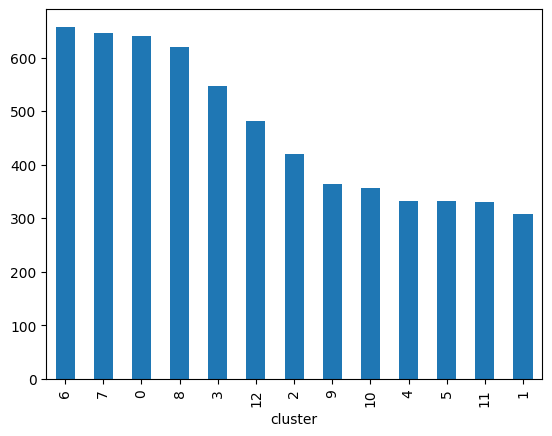

In [18]:
df['cluster'].value_counts().plot(kind='bar')
# all clusters have more than 150 patients

In [19]:
comp_list = list(range(0,13))

variable
Symptom_Acid_reflux                0.449128
Symptom_Acute_confusion            0.551001
Symptom_Altered_smell              0.413470
Symptom_Altered_taste              0.417033
Symptom_Awakened_cannot_breathe    0.501827
                                     ...   
Symptom_Vibrating_sensations       0.535182
Symptom_Vivid_dreams               0.438467
Symptom_Vomiting                   0.321097
Symptom_Waking_up_early            0.344633
Symptom_Waking_up_in_night         0.381768
Length: 147, dtype: float64

In [20]:
edges = [] 
symp_unusual = pd.DataFrame()
for component in comp_list:
    edges +=investigate_comp(component, mm).sort_values(ascending=False).head(10).index.tolist()
    symp_unusual[component] = investigate_comp(component, mm)
    print(investigate_comp(component, mm).sort_values(ascending=False).head(10))

variable
Symptom_Cognitive_Functioning_attentionconcentration    0.143810
Symptom_Cognitive_Functioning_thinking                  0.063554
Symptom_Cognitive_Functioning_problemsolving            0.042003
Symptom_Cognitive_Functioning_executive                 0.039623
Symptom_Memory_short                                   -0.017974
Symptom_Cognitive_Functioning_slowedthoughts           -0.037301
Symptom_Inability_to_yawn                              -0.037509
Symptom_Cognitive_Functioning_fastthoughts             -0.049228
Symptom_PEM                                            -0.050419
Symptom_Memory_no_new_memories                         -0.052474
dtype: float64
variable
Symptom_Gastrointestinal_abdominal_pain    0.444481
Symptom_SkinAllergy_itchy_skin             0.410362
Symptom_Sensations_coldness                0.398136
Symptom_Neuralgia                          0.397078
Symptom_Nausea                             0.392799
Symptom_SkinAllergy_itchy_eyes             0.386958
Sympt

In [21]:
print(df.cluster.value_counts().sort_index())

cluster
0     640
1     307
2     419
3     547
4     332
5     332
6     657
7     646
8     619
9     364
10    356
11    331
12    481
Name: count, dtype: int64


In [22]:
(sympdf[edges].mean()>.90).sum()

3

In [23]:
(sympdf[edges].mean()<.1).sum()
# some of the pretty rare symptoms are cluster-decisive
# I'm going to keep them in unless something pathological emerges downstream

16

In [24]:
symp_unusual.to_csv("output/stepmix_13_010324_symp_unusual.csv")

In [177]:
# plan for next time 
# plot the clusters in 2d space
# go through that sklearn paper for some plot ideas
# look at the various non-used parameters and how they assort
# look at demographics, other columns of df
# assess distinguisability of clusters--maybe some can combine?

# could laplace approximation be used to get a better estimate of the number of clusters?
# if have reason to think p(data | model ) is close to p(model), then maybe justify fewer clusters

In [183]:
mm[0]

variable
Symptom_Acid_reflux                0.369313
Symptom_Acute_confusion            0.158894
Symptom_Altered_smell              0.234075
Symptom_Altered_taste              0.294896
Symptom_Awakened_cannot_breathe    0.411089
                                     ...   
Symptom_Vibrating_sensations       0.293808
Symptom_Vivid_dreams               0.413275
Symptom_Vomiting                   0.174588
Symptom_Waking_up_early            0.280046
Symptom_Waking_up_in_night         0.622473
Name: 0, Length: 147, dtype: float64

In [199]:
# check if patients asigned to cluster 0 have average scores equivalent to column 0 of mm
# this is a bit of a sanity check

mm[0].sort_index()

df[df.cluster==0][sympdf.columns].mean().sort_index()

Symptom_Acid_reflux                0.375000
Symptom_Acute_confusion            0.160061
Symptom_Altered_smell              0.234756
Symptom_Altered_taste              0.300305
Symptom_Awakened_cannot_breathe    0.422256
                                     ...   
Symptom_Vibrating_sensations       0.291159
Symptom_Vivid_dreams               0.417683
Symptom_Vomiting                   0.169207
Symptom_Waking_up_early            0.283537
Symptom_Waking_up_in_night         0.623476
Length: 147, dtype: float64

In [202]:
model.predict(sympdf)

array([ 8, 11, 10, ...,  6,  8, 11])

In [25]:
df['cluster'].to_csv("output/cluster_13_010324.csv")

In [29]:
# compare the two clusterings 

# ARI? 
clus_old = pd.read_csv("output/cluster_13_111023.csv", index_col=0)
# gross symptoms with groupings??

# anything else? 

In [31]:
df['clusold'] = clus_old['cluster']

In [32]:
# ARI of df['cluster'] and df['clusold']
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(df['cluster'], df['clusold'])

0.48166760739468273

In [33]:
# for each cluster in 'clusold' which is the cluster in 'cluster' with the most shared members
# this is a bit of a weird thing to do but I'm curious
result = df.groupby('cluster')['clusold'].value_counts().unstack(fill_value=0)


In [35]:
result
# clusold 0 == cluster 4, 8 
# clusold 1 == cluster 5 
# clusold 2 == cluster 6,11 
# clusold 3 == cluster 7 predominantly 
# clusold 4 == cluster 10 
# clusold 5 == cluster 9 
# clusold 6 == clusters 3,6 



clusold,0,1,2,3,4,5,6,7,8,9,10,11,12
cluster,,,,,,,,,,,,,
0,28,0,0,1,2,0,0,0,299,306,3,1,0
1,0,7,1,0,0,4,11,77,0,0,8,0,199
2,0,0,0,0,0,0,0,0,36,114,4,265,0
3,7,0,29,0,0,12,231,0,0,0,10,258,0
4,107,0,1,0,0,16,4,0,0,0,43,1,160
5,0,171,0,0,0,0,0,161,0,0,0,0,0
6,0,0,145,0,0,13,189,306,0,0,2,0,2
7,0,0,0,448,42,0,0,0,110,46,0,0,0
8,498,0,0,56,0,0,1,0,41,7,11,3,2


In [163]:
# what's the takeaway here? 
# diversity of interpretations
# to say that there are real clusters would be that there isn't much diversity
# the fact that there's this degree of overlap suggests that though you can reinterpret cluster 0 as cluster 8&9 you're 
# not necessarily totally splitting it up 

# I think this is a good thing, it suggests that the clusters are not totally arbitrary

ensemble = df.iloc[:,-2:]
#

In [164]:
ensemble

,cluster,clusold
3,0,8
5,3,11
6,12,10
8,4,0
9,12,10
...,...,...
14158,11,2
14161,2,11
14163,6,6
14166,0,8


In [168]:
import numpy as np
import pandas as pd
from scipy.optimize import linear_sum_assignment

def ensemble_to_co_association(ensemble, ignore_label=None):
    #if isinstance(ensemble, pd.DataFrame) and 'labels' in ensemble.columns:
    #    df = pd.DataFrame(ensemble.labels)
    #    df = pd.DataFrame(df['labels'].to_list()).transpose()
    #else:
    #    df = pd.DataFrame(ensemble).transpose()
    df = ensemble
    N = len(df)
    co_association_matrix = np.zeros([N, N])
    n_estimators = len(ensemble)
    for ri, row in df.iterrows():
        if ri % 500 == 0:
            print(ri)
        compare = df.loc[ri + 1:]
        #return(compare)
        if ignore_label is not None:
            shared_counts = ((row == compare) * (row != -1) * (compare != -1)).sum(axis=1)
        else:
            shared_counts = (row == compare).sum(axis=1)
        co_association_matrix[ri, ri + 1:] = shared_counts / n_estimators
    return co_association_matrix


In [169]:
coass = ensemble_to_co_association(pd.DataFrame(ensemble.values, columns = ["A","B"]))

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000


In [172]:
coass.shape

(6031, 6031)

In [175]:
coass_df = pd.DataFrame(coass, index = df.index, columns = df.index)

In [180]:
# hierarchically cluster this df

from scipy.cluster.hierarchy import linkage, fcluster

def cluster_co_association_matrix(co_association_matrix, threshold=0.5):
    """
    Perform clustering on the co-association matrix.

    Parameters:
    - co_association_matrix: The co-association matrix.
    - threshold: The threshold for clustering.

    Returns:
    - clusters: A list representing the clusters assigned to each data point.
    """
    # Perform clustering based on the threshold

    clusters = fcluster(co_association_matrix, threshold, criterion='distance')

    return clusters


In [238]:
symmetric_matrix = coass + coass.T

linkage_matrix = linkage(symmetric_matrix, method='average')


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_9468/1970069541.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(symmetric_matrix, method='average')


In [281]:
clusters = fcluster(linkage_matrix, 0.006, criterion='distance')
print(len(pd.Series(clusters).unique()))
pd.Series(clusters).value_counts()


13


2     747
1     702
13    657
4     608
8     604
3     530
12    409
9     366
6     351
10    328
7     292
11    225
5     212
Name: count, dtype: int64

In [ ]:
# gets same number of clusters as before

In [287]:
clusters = fcluster(linkage_matrix, 0.006, criterion='distance')
print(len(pd.Series(clusters).unique()))
pd.Series(clusters).value_counts()

13


2     747
1     702
13    657
4     608
8     604
3     530
12    409
9     366
6     351
10    328
7     292
11    225
5     212
Name: count, dtype: int64